# **APL SURP Python course** - Notebook 3 (blank version)
### ***Plotting, control flow, defining functions, gridded data, and more***

*Created for the University of Washington Applied Physics Laboratory's Summer Undergraduate Research Program (SURP) 2025.*

For additional resources on Python basics, you can consult the following resources on the APL-SURP Python course website:
* Tutorials on Python fundamentals: https://uw-apl-surp.github.io/aplsurp-python/overview.html
* Complementary lessons on specific Python topics: https://uw-apl-surp.github.io/aplsurp-python/complementary_lessons.html

In [ ]:
import numpy as np                         # NumPy is an array and math library
import matplotlib.pyplot as plt            # Matplotlib is a visualization (plotting) library
import pandas as pd                        # Pandas lets us work with spreadsheet (.csv) data
from datetime import datetime, timedelta   # Datetime helps us work with dates and times

## Part 1: Line and scatter plots

It's time for us to start creating visualizations of data, called **plots**.

At the top of this page, we imported the package Matplotlib using:

> `import matplotlib.pyplot as plt`

Creating a **line plot** is simple. We use the Matplotlib function **`plt.plot()`**. The basic form of the function is:

> **`plt.plot(X, Y, <FORMAT_ARGUMENTS>...)`**

Here, `X` and `Y` should be 1-D lists or arrays of data. The options for `<FORMAT_ARGUMENTS>` can be found on Matplotlib's [documentation webpage](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [ ]:
x = np.array([0,1,2,3,4])
y = np.array([0,4,2,6,4])

plt.plot(x,y)

Some formatting arguments include:
* `c` or `color`: line color (options: `'k'` or `'black'` for black, `'red'` for red, etc. – see [this page](https://matplotlib.org/stable/gallery/color/named_colors.html) for color options)
* `lw` or `linewidth`: line width (a number; the default is 1.5)
* `ls` or `linestyle`: line style (options: `'-', '--', '-.', ':'`)
* `marker`: optional marker style (options: `'.', 'o', 'v', '^', '<', '>', 's', '*',` etc.)
* `ms` or `markersize`: optional marker size (a number)

***Try plotting x versus y again, except this time use a "goldenrod"-colored dashed line of width 2.5 with star-shaped markers of size 20:***

In [ ]:
# Write your code here:



Some other options include changing the figure size by starting with a call to:

> **`plt.figure(figsize=(WIDTH,HEIGHT))`**

Adding x-axis and y-axis labels and a title at the top:

> **``plt.xlabel(STRING)``**

> **``plt.ylabel(STRING)``**

> **``plt.title(STRING)``**

Adding grid lines using:

> **`plt.grid()`**

Or adding multiple lines by specifying the **`label`** argument in `plt.plot()` and adding a key using:

> **`plt.legend()`**

Check out these additional formatting options below:

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(x,y,label='Original data')
plt.plot(x,2*y,label='2 * y')   # y-values are multiplied by 2 here
plt.legend()
plt.grid()
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title('This is a title');

We can also create a **scatter plot** with just the points (no line). The function is similar to ``plt.plot()``:

> **``plt.scatter(X, Y, s=SIZE, c=COLOR, marker=MARKER_STYLE, etc.)``**

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(x,y,s=100,c='dodgerblue',marker='^');

---

***Let's bring it all together! Below, try plotting the monthly temperatures in New York, NY and Seattle, WA. Use line plots with circle-shaped markers (or add scatter points separately). Include a legend and label the plot appropriately.***

In [ ]:
temp = np.array([[30.3,32.0,39.4,50.8,60.9,70.3,76.0,74.5,68.1,56.6,45.8,36.5],   # (New York; temperatures in °F)
                 [40.0,40.6,44.2,48.4,54.9,60.2,66.2,66.7,60.5,52.0,44.5,39.6]])  # (Seattle)

# Write your code below:


---

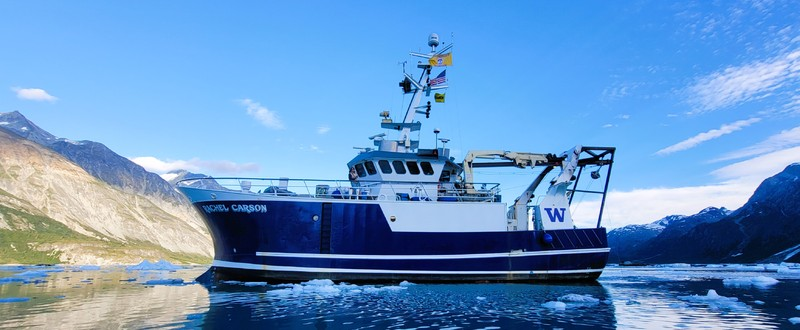

*Image source: [UW](https://www.ocean.washington.edu/story/RV_Rachel_Carson)*

Now, let's plot the ocean CTD profiles measured by the R/V *Rachel Carson*. Recall that we previously loaded the CTD profiles measured on two different days as `data_0` and `data_1`.

Let's remind ourselves of what the `pandas` `DataFrame` looks like:

In [ ]:
display(data_0)

With the tools we have, we can make line plots of temperature vs. depth that include both CTD casts.

Note that the following line of code flips the y-axis so the surface is at the top: **`plt.gca().invert_yaxis()`**.

In the code below, notice how the x- and y-axes are both labeled properly.

In [ ]:
# Temperature vs. depth profile
plt.plot(data_0['t090C'],data_0['depSM'],label='Cast #1 (5/10/23)')
plt.plot(data_1['t090C'],data_1['depSM'],label='Cast #2 (5/11/23)')
plt.legend()
plt.gca().invert_yaxis()   # This reverses the y-axis
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('R/V Carson CTD casts')
plt.grid()

***Can you try plotting another parameter vs. depth? Note: the file contains salinity (`sal00`), oxygen (`sbeox0Mg/L`), chlorophyll fluorescence (`flECO-AFL`), and pH (`ph`) data.***

In [ ]:
# Write your code here:



## Part 2: Exploring ocean time series data from the Seattle Aquarium

Seattle is located in King County. King County's Department of Natural Resources & Parks maintains several ocean measurement stations in Puget Sound. These sensors monitor the water quality and ocean conditions.

One of these stations is at the Seattle Aquarium on the waterfront in downtown Seattle.

The station consists of a mooring with two sensors. Sensor #1 is at a depth of 1 meter, and sensor #2 is at a depth of 10 m.

The mooring data can be obtained from King County here: https://green2.kingcounty.gov/marine-buoy/Data.aspx. However, the data requires a bit of processing before it can be loaded into Python.

***You can download the processed data file from Google Drive [here](https://drive.google.com/drive/folders/1Am6XdlB-APQ3ccOvLeGK8DFPQ2OnPeJD?usp=share_link).*** This CSV file, `SeattleAquarium_7_2_2025_to_7_15_2025.csv`, contains data measured every 15 minutes for the two weeks from July 2 to July 15, 2025.

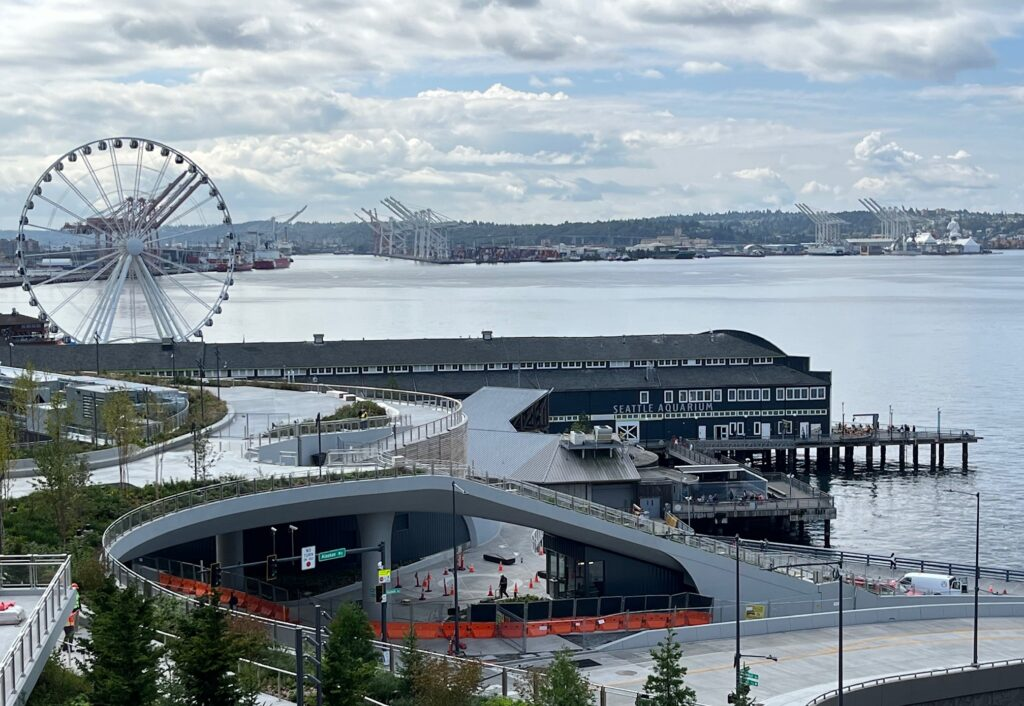

*Image source: [MyEdmondsNews](https://myedmondsnews.com/2024/08/day-trip-discoveries-visit-the-seattle-aquariums-new-ocean-pavilion/)*

The following call to `pd.read_csv()` will load the data file correctly.

The function arguments will ignore comments (`comment='*'`), set the header to the first non-commented row (`header=0`), set the index to the first column (`index_col=0`), interpret that column as datetimes (`parse_dates=True`), and specify the file input encoding (`encoding='unicode_escape'`).

In [ ]:
# Run this code to load the data
aqua = pd.read_csv('/content/SeattleAquarium_7_2_2025_to_7_15_2025.csv',
                   comment='*',header=0,index_col=0,parse_dates=True,encoding='unicode_escape')
display(aqua)

Since Pandas won't display all the column names, we can use the `.columns` attribute to see them:

In [ ]:
print(aqua.columns)

We learned how to create X-Y line and scatter plots using `plt.plot()` above. However, Pandas offers us a shortcut.

You can call `.plot()` on a Pandas Series to generate a line plot. The function arguments include many of those you learned for `plt.plot()`. They can be found in the online documentation: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html.

In [ ]:
# Plot temperature from upper (1-meter) and lower (10-meter) sensors
aqua['1_Water_Temperature_degC'].plot()
aqua['2_Water_Temperature_degC'].plot()
plt.legend()

Note the spike in the temperature data on July 14, and then the apparent switch of the Sensor 1 and Sensor 2 data streams. ***What do you think happened at the Aquarium?***

We'll learn how to use boolean indexing to mask out bad data later. But for now, let's change the y-axis limits to zoom in on the good data.

In [ ]:
# Plot temperature from upper (1-meter) and lower (10-meter) sensors
aqua['1_Water_Temperature_degC'].plot()
aqua['2_Water_Temperature_degC'].plot()
plt.ylim([11.0,16.0])   # Set y-axis limits to ignore data spike
plt.legend()

***Try exploring the data. Can you answer some of the following questions by making plots and using the functions you already know?***

*   What was the warmest ocean temperature seen in this data? *(Feel free to slice the data to ignore periods of seemingly incorrect measurements.)*
*   On average, how much colder is the deep (10-meter) sensor than the shallow (1-meter) sensor? *(Feel free to slice the data to ignore periods of seemingly incorrect measurements.)*
*   What day likely had a significant rain event? *(Hint: rain is fresh water, and the ocean is salty.)*
*   What direction is phytoplankton growth trending in over this data period? *(Hint: chlorophyll concentration is a measure of how much phytoplankton are in seawater.)*
*   What is the relationship between near-surface ocean temperature and phytoplankton?

In [ ]:
# Try exploring the data here:



## Part 3: Logical operations

Often, we will want to compare two numbers or variables. We do this using the following **logical operations**:

* `==` : equal
* `!=` : not equal
* `>` : greater than
* `>=` : greater than or equal to
* `<` : less than
* `<=` : less than or equal to
* `and` or `&` : are both booleans true?
* `or` or `|` : is either boolean true?
* `not` or `~` : reverse the boolean (True -> False, False -> True)
* `in` : is a member
* `not in` : is not a member

Each logical operation **evaluates to** (returns) a boolean — True or False. Consider the following examples:

In [ ]:
3 == 3

In [ ]:
3 == 3.0    # integers can be compared to floating-point numbers

In [ ]:
not 3 == 3

In [ ]:
3 == 5

In [ ]:
3 != 5

In [ ]:
3 > 5

In [ ]:
5 <= 5

In [ ]:
(11 == 12) or (12 == 12)

In [ ]:
(11 == 12) and (12 == 12)

Applying a logical comparison to a NumPy array gives a **boolean array**!

In [ ]:
x = np.array([1,2,3,4,5,6])

print(x < 4)
print(x <= 4)

In [ ]:
# Note: "not" can't be applied to an entire boolean array. Instead, we have to use "~":
print(~np.array([True,False,True]))

Note that membership tests work on lists, arrays, and strings:

In [ ]:
print(3 in x)      # this is asking: "is 3 in x?"

In [ ]:
print(7 in x)

In [ ]:
print(3 not in x)  # this is asking: "is 3 not in x?"

In [ ]:
print('hello' in 'hello world')

In [ ]:
print('o w' in 'hello world')

In [ ]:
print('World' in 'hello world')   # note that string membership is case-sensitive

Heads up: this next skill is super powerful. We saw above that applying a logical comparison to an array of numbers gives us a boolean array.

We can use boolean arrays as "**masks**" to select certain elements of an array. This is called **boolean indexing**.

Here are a few ways to use it:

In [ ]:
# Here are the pH values from last week's lesson:
pH_measurements = np.array([7.84, 7.91, 8.05, np.nan, 7.96, 8.03])
print('pH measurements:',pH_measurements)

# Remember that we can test for missing data (np.NaN values) using np.isnan():
print('Result of np.isnan():',np.isnan(pH_measurements))

# The resulting boolean array can be used to extract only the valid data:
print('Array after removing missing data:',pH_measurements[~np.isnan(pH_measurements)])

pH measurements: [7.84 7.91 8.05  nan 7.96 8.03]
Result of np.isnan(): [False False False  True False False]
Array after removing missing data: [7.84 7.91 8.05 7.96 8.03]


In [ ]:
# Let's revisit the Seattle temperatures from earlier:
seattle_temps = np.array([40.0,40.6,44.2,48.4,54.9,60.2,66.2,66.7,60.5,52.0,44.5,39.6])

# Applying a logical comparison creates a boolean array, or "mask":
print(seattle_temps > 60)

In [ ]:
# Now let's use the mask to retrieve only the elements where the mask is True:
seattle_temps[seattle_temps > 60]

# Note: this only works when the mask is the same length as the array!

In [ ]:
# The boolean indexing gives the same result as specifying the actual array indices:
seattle_temps[[5,6,7,8]]

***How many months of the year is Seattle 40°F or colder? Try using boolean indexing and a function that you've learned to calculate and print the answer:***

In [ ]:
# Write your code here:
